# Polynomial Regression

## Introduction

Polynomial regression means transforming your features into quadratic (squared) or higher-order polynomial terms so that you can model a non-linear relationship using linear regression.

## Objectives

You will be able to:

- Determine if polynomial regression would be useful for a specific model or set of data
- Create polynomial terms out of independent variables in linear regression
- Interpret coefficients of linear regression models that contain polynomial terms

## Polynomial Functions

In data science we typically define ***polynomial*** to mean a feature raised to a power of 2 or higher. (This is a looser definition than you might have learned in math class.) The power that the feature is raised to is called the ***degree*** of the polynomial.

Below we plot some examples of polynomials with different degrees:

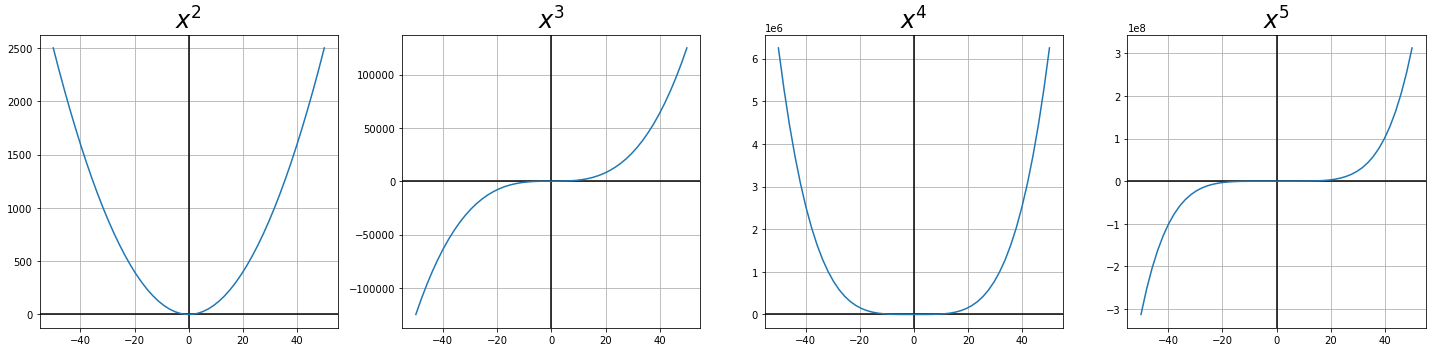

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline
mpl.rcParams["axes.grid"] = True

x = np.linspace(-50, 50, 50)
fig, axes = plt.subplots(ncols=4, figsize=(20,5))
for i, ax in enumerate(axes):
    ax.axhline(0, color="black")
    ax.axvline(0, color="black")
    degree = i + 2
    ax.plot(x, x**degree)
    ax.set_title(f"$x^{degree}$", {"fontsize": 24})

fig.tight_layout()

Similar to an interaction term, a polynomial term can also be added to a linear function in the form $y = mx + b$. Below we demonstrate some examples using a polynomial of degree 2, also called a ***quadratic*** function, which is represented in the form $y = ax^2 + bx + c$.

This is one of the most common polynomials you'll see in data science and the associated curved shape is called a ***parabola***. Parabolas can have various shapes and positions depending on the coefficients used.

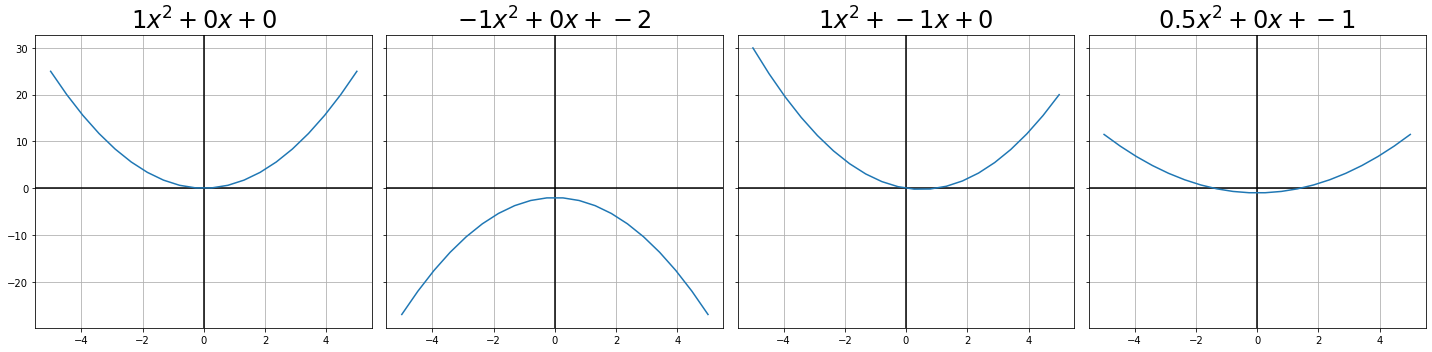

In [2]:
fig, axes = plt.subplots(ncols=4, figsize=(20,5), sharey=True)

coefficients = (
    (1, 0, 0),
    (-1, 0, -2),
    (1, -1, 0),
    (0.5, 0, -1)
)
x = np.linspace(-5, 5, 20)
for i, (a, b, c) in enumerate(coefficients):
    ax = axes[i]
    ax.axhline(0, color="black")
    ax.axvline(0, color="black")
    ax.plot(x, a * x**2 + b * x + c)
    ax.set_title(f"${a}x^2 + {b}x + {c}$", {"fontsize": 24})

fig.tight_layout()

## Attempting Linear Regression on a Non-Linear Relationship

The dataset `'yields.csv'`, with just 21 cases, contains measurements of the yields from an experiment done at six different levels of temperature in degrees Fahrenheit.

In [3]:
import pandas as pd

yld = pd.read_csv('yield.csv', sep='\s+', index_col=0)
yld.head()

,Temp,Yield
i,,
1,50,3.3
2,50,2.8
3,50,2.9
4,50,3.2
5,60,2.7


Let's plot temperature vs. yield.

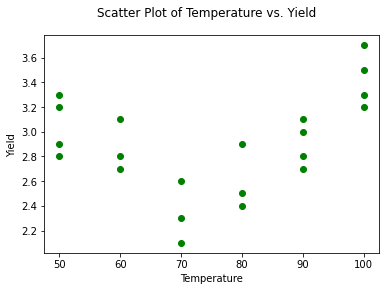

In [4]:
mpl.rcParams["axes.grid"] = False

y = yld['Yield']
X = yld.drop(columns='Yield', axis=1)

fig, ax = plt.subplots()
ax.scatter(X, y, color='green')
ax.set_xlabel('Temperature')
ax.set_ylabel('Yield')
fig.suptitle("Scatter Plot of Temperature vs. Yield");

It's clear that this relationship is not linear. Let's try and fit a linear regression anyways and see how the model performs:

In [5]:
import statsmodels.api as sm
linear_results = sm.OLS(y, sm.add_constant(X)).fit()

In [6]:
linear_results.params

const    2.415106
Temp     0.006404
dtype: float64

In [7]:
linear_results.rsquared

0.08605718085106395

We are explaining about 9% of the variance in yield. Let's look at that model on a graph:

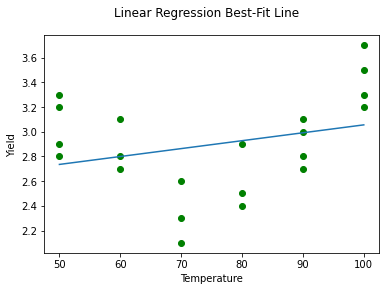

In [8]:
fig, ax = plt.subplots()
ax.scatter(X, y, color='green')
ax.plot(X, linear_results.predict(sm.add_constant(X)))
ax.set_xlabel('Temperature')
ax.set_ylabel('Yield')
fig.suptitle("Linear Regression Best-Fit Line");

This is clearly not a good fit for the data. The data points seem to form a parabola shape, so let's try creating a polynomial term to see if it improves!

## A Quadratic Relationship

### Adding a Squared Term

Creating a 2nd-degree polynomial (squared term) is pretty straightforward, using `pandas` broadcasting. Let's call ours `Temp_sq`:

In [9]:
X_quad = X.copy()
X_quad['Temp_sq'] = X_quad['Temp']**2
X_quad

,Temp,Temp_sq
i,,
1,50,2500
2,50,2500
3,50,2500
4,50,2500
5,60,3600
6,60,3600
7,60,3600
8,70,4900
9,70,4900


### Building a Quadratic Model

Now let's fit a linear regression on `Temp` and `Temp_sq`:

In [10]:
squared_results = sm.OLS(y, sm.add_constant(X_quad)).fit()

### Viewing Quadratic Model Results

In [11]:
squared_results.rsquared

0.6948165884110555

That's a much better metric! But what did we actually just do?

Let's plot our new model's predictions:

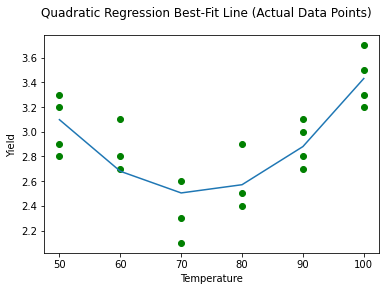

In [12]:
fig, ax = plt.subplots()
ax.scatter(X_quad["Temp"], y, color='green')
ax.plot(X_quad["Temp"], squared_results.predict(sm.add_constant(X_quad)))
ax.set_xlabel('Temperature')
ax.set_ylabel('Yield')
fig.suptitle("Quadratic Regression Best-Fit Line (Actual Data Points)");

Note that you get a seemingly "piecewise linear" function here,  because the yields were only measured at 50, 60, 70, 80, 90 and 100. In reality, this model generates a smooth curve, as denoted below.

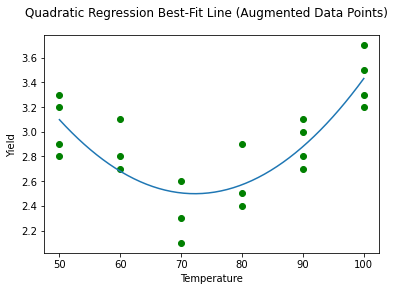

In [13]:
X_smooth = pd.DataFrame(np.linspace(50, 100, 50), columns=['Temp'])
X_smooth['Temp_sq'] = X_smooth['Temp'] ** 2

fig, ax = plt.subplots()
ax.scatter(X["Temp"], y, color='green')
ax.plot(X_smooth["Temp"], squared_results.predict(sm.add_constant(X_smooth)))
ax.set_xlabel('Temperature')
ax.set_ylabel('Yield')
fig.suptitle("Quadratic Regression Best-Fit Line (Augmented Data Points)");

### Interpreting Quadratic Model Results

Because we added a squared term to our model, we went from fitting this regression model:

$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x$$

To fitting this regression model:

$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_2}x^2$$

Based on our improved R-Squared score as well as qualitatively inspecting the graphs of the best-fit lines, it looks like we have a better model. But how would we interpret these results?

In [14]:
squared_results.params

const      8.817531
Temp      -0.174928
Temp_sq    0.001211
dtype: float64

In [15]:
squared_results.pvalues

const      2.122009e-07
Temp       1.868031e-05
Temp_sq    1.145398e-05
dtype: float64

Since all of the p-values are below a standard alpha of 0.05, let's plug in those values. The function created by our fitted model is $y = 0.0012x^2 - 0.17x + 8.8$.

#### Intercept

The interpretation of the intercept is essentially the same as any other intercept. When all features have a value of 0, we expect the target to be about 8.8. As is often the case, this is not particularly interpretable, because we don't have any data points where `Temp` is equal to 0. We might consider centering the `Temp` values if interpretation of the intercept matters.

#### $x$ and $x^2$ Coefficients

We have essentially added an interaction term of `Temp` with itself. This means that a "one-at-a-time" interpretation is not possible, because there can't be a 1-unit increase of `Temp` while `Temp_sq` is held constant at 0.

Instead they must be interpreted together. So, for each increase of 1 degree of `Temp`, we see a change of -0.17 + (0.0012 x `Temp`) in `Yield`.

We can also incorporate more of a quadratic-specific explanation. Because the `Temp_sq` coefficient is positive (and based on looking at the graph), we know that this parabola has a minimum value at its vertex. To calculate the minimum point, the formula is $(-b / 2a, c - b^2 / 4a)$ (you can find the longer derivation for this formula [here](https://youtu.be/r2oywW2A-6M)).

In [16]:
a = squared_results.params["Temp_sq"]
b = squared_results.params["Temp"]
c = squared_results.params["const"]

x_vertex, y_vertex = (-b / (2 * a), c - (b ** 2) / (4 * a))
x_vertex, y_vertex

(72.24853453215083, 2.4983975303475425)

Below we plot this point on the graph as well:

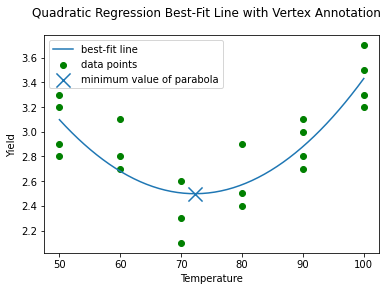

In [17]:
fig, ax = plt.subplots()
ax.scatter(X["Temp"], y, color='green', label="data points")
ax.plot(X_smooth["Temp"], squared_results.predict(sm.add_constant(X_smooth)), label="best-fit line")
ax.scatter(x_vertex, y_vertex, s=200, marker="x", label="minimum value of parabola")
ax.legend()
ax.set_xlabel('Temperature')
ax.set_ylabel('Yield')
fig.suptitle("Quadratic Regression Best-Fit Line with Vertex Annotation");

Using this point, we can say that for `Temp` values below about 72, the `Yield` decreases as the `Temp` increases until it reaches a minimum expected `Yield` of about 2.5. Then for `Temp` values above about 72, the `Yield` increases as the `Temp` increases.

## Higher-Order Relationships

The use of polynomials is not restricted to quadratic relationships. You can explore cubic or higher order relationships as well!

### Adding Polynomial Terms

You could write custom `pandas` code to achieve this, but there is also a tool we can import from the `preprocessing` module of scikit-learn called `PolynomialFeatures`.

Let's test it out with a degree of 6.

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(6)
X_poly = poly.fit_transform(X)

Take a look at what these transformed features really look like. As you can see, `PolynomialFeatures` transformed the X value of a single 50 into $50^0$ through $50^6$! The first value of 1 ($50^0$) represents the intercept in the linear regression, which you can read more about in the [PolynomialFeatures documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

In [19]:
feature_names = poly.get_feature_names_out(input_features=X.columns)

print(f'The transformed feature names are: {feature_names}')
print('------------------')
print(f'The first row of transformed data is: {X_poly[0]}')

The transformed feature names are: ['1', 'Temp', 'Temp^2', 'Temp^3', 'Temp^4', 'Temp^5', 'Temp^6']
------------------
The first row of transformed data is: [1.0000e+00 5.0000e+01 2.5000e+03 1.2500e+05 6.2500e+06 3.1250e+08
 1.5625e+10]


We can also make the result back into a dataframe for easier viewing:

In [20]:
X_poly = pd.DataFrame(X_poly, columns=feature_names, index=X.index)
X_poly

,1,Temp,Temp^2,Temp^3,Temp^4,Temp^5,Temp^6
i,,,,,,,
1,1.0,50.0,2500.0,125000.0,6250000.0,3.125000e+08,1.562500e+10
2,1.0,50.0,2500.0,125000.0,6250000.0,3.125000e+08,1.562500e+10
3,1.0,50.0,2500.0,125000.0,6250000.0,3.125000e+08,1.562500e+10
4,1.0,50.0,2500.0,125000.0,6250000.0,3.125000e+08,1.562500e+10
5,1.0,60.0,3600.0,216000.0,12960000.0,7.776000e+08,4.665600e+10
6,1.0,60.0,3600.0,216000.0,12960000.0,7.776000e+08,4.665600e+10
7,1.0,60.0,3600.0,216000.0,12960000.0,7.776000e+08,4.665600e+10
8,1.0,70.0,4900.0,343000.0,24010000.0,1.680700e+09,1.176490e+11
9,1.0,70.0,4900.0,343000.0,24010000.0,1.680700e+09,1.176490e+11


### Building a Polynomial Model

Now you can fit a linear regression model with your transformed data. Note that you do **not** need to use `sm.add_constant` because `PolynomialFeatures` has already added a constant.

In [21]:
poly_results = sm.OLS(y, X_poly).fit()

### Viewing Polynomial Model Results

Let's start by comparing R-Squared values again.

In [22]:
print(f"""
Comparing R-Squared Results:
Linear Regression:                {linear_results.rsquared}
Quadratic Regression:             {squared_results.rsquared}
6th Degree Polynomial Regression: {poly_results.rsquared}
""")


Comparing R-Squared Results:
Linear Regression:                0.08605718085106395
Quadratic Regression:             0.6948165884110555
6th Degree Polynomial Regression: 0.7591134874665022



It looks like we have a marginal improvement in R-Squared for the 6th degree polynomial regression compared to the quadratic (2nd degree polynomial) regression. What does this look like in terms of the graph?

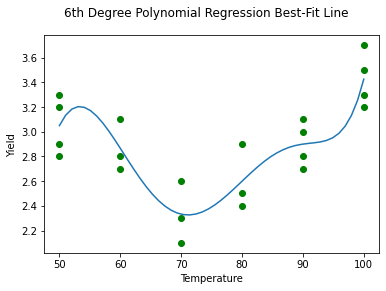

In [23]:
X_smooth = poly.transform(X_smooth.drop(columns=["Temp_sq"]))

fig, ax = plt.subplots()
ax.scatter(X["Temp"], y, color='green')
ax.plot(X_smooth[:, 1], poly_results.predict(X_smooth))
ax.set_xlabel('Temperature')
ax.set_ylabel('Yield')
fig.suptitle("6th Degree Polynomial Regression Best-Fit Line");

That's a much more complex curve!

Given how few data points we actually have, it's difficult to tell whether this is really a better fit than the quadratic model just by looking at the graph.

### Interpreting Polynomial Model Results

Let's check out the coefficients and p-values:

In [24]:
poly_results.params

1        -6.516328e-01
Temp     -7.686863e+00
Temp^2    5.488636e-01
Temp^3   -1.516236e-02
Temp^4    2.048805e-04
Temp^5   -1.359511e-06
Temp^6    3.553543e-09
dtype: float64

In [25]:
poly_results.pvalues

1         0.137393
Temp      0.137404
Temp^2    0.133079
Temp^3    0.134236
Temp^4    0.137672
Temp^5    0.142381
Temp^6    0.147712
dtype: float64

We are now up to 7 coefficients and **none** of them are statistically significant at an alpha of 0.05 -- not even the intercept. If the goal is to generate inferential insights, this model is not especially useful.

## Additional Resources

* Check out [this resource](https://www.khanacademy.org/math/algebra/x2f8bb11595b61c86:quadratic-functions-equations) for a refresher on parabolas and the relationship between quadratic graphs and formulas
* Wondering why we always seem to use every lower degree term instead of skipping to a higher degree? [This resource](https://maxhfarrell.com/bus41100/handout_41100_PolynomialRegression.pdf) demonstrates how that would be similar to skipping the intercept term and involve making undue assumptions

## Summary

Great! You now know how to include polynomials in your linear models. Let's go ahead and practice this knowledge!